In [1]:
import pandas as pd
import numpy as np


advertising = pd.read_csv('data/advertising.csv').drop(columns='Unnamed: 0')
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


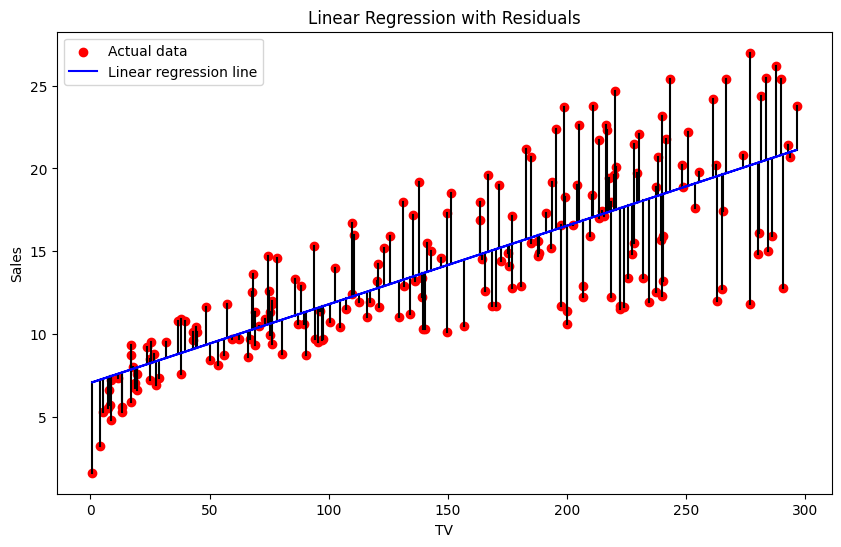

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare the data
X = advertising[['TV']]
y = advertising['sales']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting vertical lines for residuals
for i in range(len(X)):
    plt.plot([X.iloc[i], X.iloc[i]], 
    [predictions[i], y.iloc[i]], color='black', linestyle='-')  # Swapped the order of predictions[i] and y.iloc[i]

plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, predictions, color='blue', label='Linear regression line')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression with Residuals')
plt.legend()
plt.show()


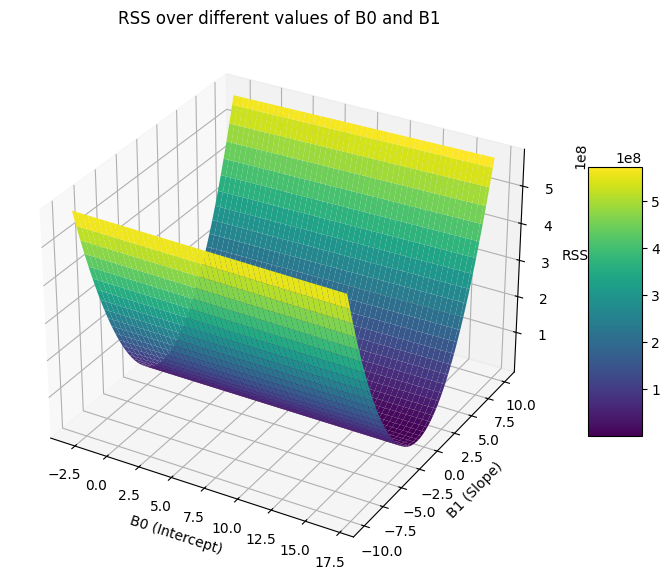

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Calculate RSS for a range of B0 and B1 values
B0_range = np.linspace(model.intercept_ - 10, model.intercept_ + 10, 100)
B1_range = np.linspace(model.coef_[0] - 10, model.coef_[0] + 10, 100)
B0, B1 = np.meshgrid(B0_range, B1_range)
RSS = np.zeros(B0.shape)

for i in range(len(B0)):
    for j in range(len(B1)):
        y_pred = B0[i, j] + B1[i, j] * X['TV']
        RSS[i, j] = ((y - y_pred) ** 2).sum()

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(B0, B1, RSS, cmap='viridis', edgecolor='none')
ax.set_xlabel('B0 (Intercept)')
ax.set_ylabel('B1 (Slope)')
ax.set_zlabel('RSS')
ax.set_title('RSS over different values of B0 and B1')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
